In [1]:
%load_ext autoreload
%autoreload 2

%config IPCompleter.greedy=True

# Stellar mass vs. $v_\text{max}$

First, imports:

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from astropy import units
from pathlib import Path
import os

import snapshot_obj
import curve_fit

import importlib

In [7]:
importlib.reload(snapshot_obj)
importlib.reload(curve_fit)

<module 'curve_fit' from '/home/kassiili/Curvaton_Simulations/analysis/curve_fit.py'>

## Get data

Next, I retrieve the data. We are only interested in luminous halos. Also, there might be some spurious cases with odd values of $v_\text{max}$.

In [8]:
# Choose galaxy:
galaxy = 'M31'

if galaxy == 'M31':
    gn=1
else:
    gn=2

In [10]:
# Only satellites, luminous and dark:

data = {}

mins = 100
maxs = 127
step = 5

for snap in range(maxs,mins,-step):

    snapshot = snapshot_obj.Snapshot("CDM_V1_LR",snap,snap)
    vmax = snapshot.get_subhalos("Vmax")
    SM = snapshot.get_subhalos("Stars/Mass")
    GNs = snapshot.get_subhalos("GroupNumber")
    SGNs = snapshot.get_subhalos("SubGroupNumber")

    # Get the subhalos of the right galaxy:
    mask = np.logical_and.reduce((vmax > 0, GNs == gn))

    # Convert to proper units:
    vmax = vmax[mask] / 100000 # cm/s to km/s 
    SM = SM[mask] * units.g.to(units.Msun)

    # Sort arrays in descending order:
    vmax[::-1].sort()
    
    data[snap] = vmax


## Plot

In [11]:
# Set some parameters:
x_down = 7; x_up = 100
y_down = 1; y_up = 200

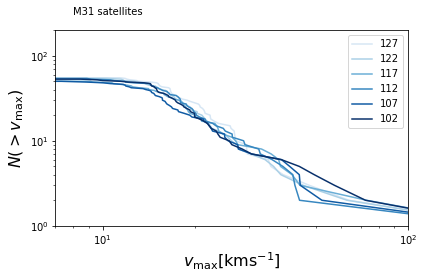

In [15]:
fig, axes = plt.subplots()

# Set axes:
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim(x_down,x_up)
axes.set_ylim(y_down,y_up)

# Set labels:
axes.set_xlabel('$v_{\mathrm{max}}[\mathrm{km s^{-1}}]$', fontsize=16)
axes.set_ylabel('$N(>v_{\mathrm{max}})$', fontsize=16)
#axes.set_title('Stellar mass of satellites')
#axes.text(11, 2*10**9, 'isolated galaxies')
#axes.set_title('Stellar mass of isolated galaxies')

# Galaxy text:
axes.text(8, 300, '{} satellites'.format(galaxy))
#self.axes.set_title('Distribution of satellites as a function of $v_{max}$')

n = int((maxs-mins)/step)+1
toolight = int(len(data)/4)
colors = plt.cm.Blues(np.linspace(0,1,len(data) + toolight))[toolight:]

for i,(snap,vmax) in enumerate(data.items()):
    x = np.arange(1, vmax.size+1)
    
    # Continue to left:
    x = np.concatenate((x,np.array([x[-1]])))
    vmax = np.concatenate((vmax,np.array([0.01])))

    axes.plot(vmax, x, label=snap, color=colors[i])
    
    
plt.legend()
plt.tight_layout()


# Save figure:

filename = 'cumulDistByVmax_evol_{}.png'.format(galaxy)

home = os.path.dirname(snapshot_obj.__file__)
path = os.path.join(home,"Figures")

# If the directory does not exist, create it
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(os.path.join(path,filename), dpi=200)